<a href="https://colab.research.google.com/github/Sudhakathir16/sql-asignment/blob/main/NLP_MY_PROJECT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_df=pd.read_csv('/content/train.txt')
train_df

i didnt feel humiliated;sadness
0      i can go from feeling so hopeless to so damned...
1      im grabbing a minute to post i feel greedy wro...
2      i am ever feeling nostalgic about the fireplac...
3                             i am feeling grouchy;anger
4      ive been feeling a little burdened lately wasn...
...                                                  ...
15994  i just had a very brief time in the beanbag an...
15995  i am now turning and i feel pathetic that i am...
15996                 i feel strong and good overall;joy
15997  i feel like this was such a rude comment and i...
15998  i know a lot but i feel so stupid because i ca...

[15999 rows x 1 columns]

In [ ]:
test_df=pd.read_csv('/content/test.txt')
test_df

im feeling rather rotten so im not very ambitious right now;sadness
0     im updating my blog because i feel shitty;sadness                 
1     i never make her separate from me because i do...                 
2     i left with my bouquet of red and yellow tulip...                 
3     i was feeling a little vain when i did this on...                 
4     i cant walk into a shop anywhere where i do no...                 
...                                                 ...                 
1994  i just keep feeling like someone is being unki...                 
1995  im feeling a little cranky negative after this...                 
1996  i feel that i am useful to my people and that ...                 
1997  im feeling more comfortable with derby i feel ...                 
1998  i feel all weird when i have to meet w people ...                 

[1999 rows x 1 columns]

In [ ]:
val_df=pd.read_csv('/content/val.txt')
val_df

im feeling quite sad and sorry for myself but ill snap out of it soon;sadness
0     i feel like i am still looking at a blank canv...                           
1                   i feel like a faithful servant;love                           
2               i am just feeling cranky and blue;anger                           
3     i can have for a treat or if i am feeling fest...                           
4     i start to feel more appreciative of what god ...                           
...                                                 ...                           
1994  im having ssa examination tomorrow in the morn...                           
1995  i constantly worry about their fight against n...                           
1996  i feel its important to share this info for th...                           
1997  i truly feel that if you are passionate enough...                           
1998  i feel like i just wanna buy any cute make up ...                           

[1999 rows x 1 columns]

In [ ]:
print(train_df.shape)
print(test_df.shape)
print(val_df.shape)

(15999, 1)
(1999, 1)
(1999, 1)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from keras import optimizers

In [ ]:
print(train_df.head(10))

# Split the single column into 'text' and 'label' columns
train_df[['text', 'label']] = train_df[train_df.columns[0]].str.split(';', expand=True)

unique_count_col1 = train_df['label'].nunique()
print(unique_count_col1)

                     i didnt feel humiliated;sadness
0  i can go from feeling so hopeless to so damned...
1  im grabbing a minute to post i feel greedy wro...
2  i am ever feeling nostalgic about the fireplac...
3                         i am feeling grouchy;anger
4  ive been feeling a little burdened lately wasn...
5  ive been taking or milligrams or times recomme...
6  i feel as confused about life as a teenager or...
7  i have been with petronas for years i feel tha...
8                           i feel romantic too;love
9  i feel like i have to make the suffering i m s...
6


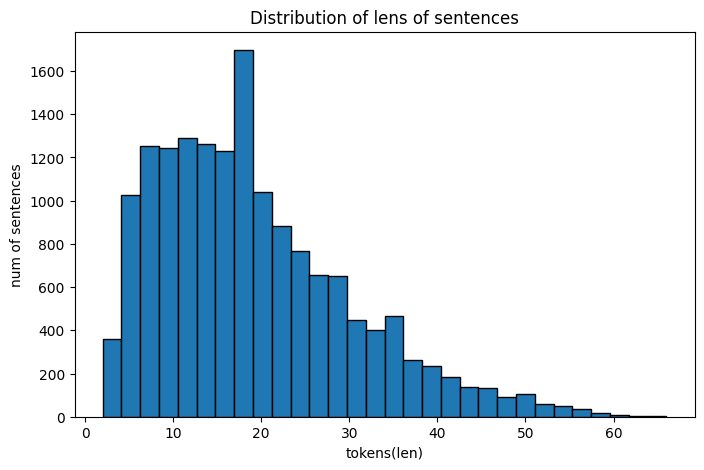

Max length: 66
Avg length: 19.16726045377836


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df["text"])
sequences = tokenizer.texts_to_sequences(train_df['text'])

lengths = [len(seq) for seq in sequences]

plt.figure(figsize=(8,5))
plt.hist(lengths, bins=30, edgecolor="k")
plt.title("Distribution of lens of sentences")
plt.xlabel("tokens(len)")
plt.ylabel("num of sentences")
plt.show()

print("Max length:", max(lengths))
print("Avg length:", sum(lengths)/len(lengths))

In [ ]:
MAX_LEN = 30

# Split the single column into 'text' and 'label' columns for test and validation DataFrames
val_df[['text', 'label']] = val_df[val_df.columns[0]].str.split(';', expand=True)
test_df[['text', 'label']] = test_df[test_df.columns[0]].str.split(';', expand=True)

X_train = pad_sequences(tokenizer.texts_to_sequences(train_df["text"]), maxlen=MAX_LEN, padding="post", truncating="post")
X_val = pad_sequences(tokenizer.texts_to_sequences(val_df["text"]), maxlen=MAX_LEN, padding="post", truncating="post")
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df["text"]), maxlen=MAX_LEN, padding="post", truncating="post")


print(X_train)

le = LabelEncoder()

y_train = tf.keras.utils.to_categorical(le.fit_transform(train_df["label"]))
y_val   = tf.keras.utils.to_categorical(le.transform(val_df["label"]))
y_test  = tf.keras.utils.to_categorical(le.transform(test_df["label"]))
print (y_train)

[[   1   39  100 ...    0    0    0]
 [  16 3059    6 ...    0    0    0]
 [   1   23  164 ...    0    0    0]
 ...
 [   1    2  326 ...    0    0    0]
 [   1    2   13 ...    0    0    0]
 [   1   46    6 ...    0    0    0]]
[[0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


/tmp/ipython-input-1188245481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=train_df, order=train_df['label'].value_counts().index, palette="Set2")


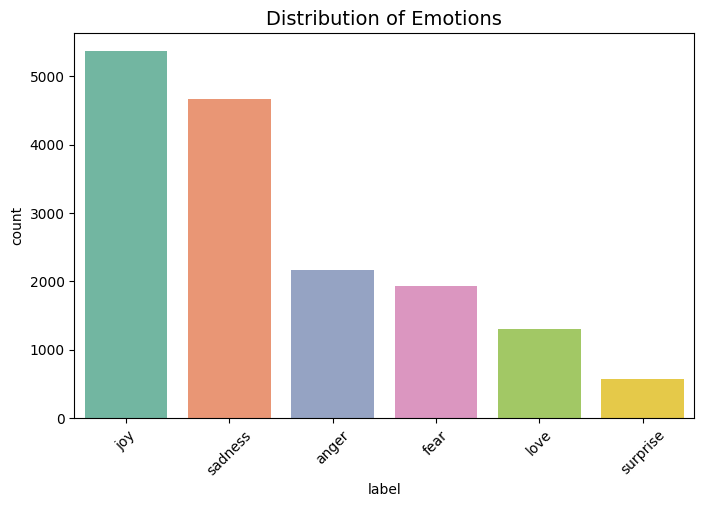

In [ ]:
#  Distribution of emotions
plt.figure(figsize=(8,5))
sns.countplot(x="label", data=train_df, order=train_df['label'].value_counts().index, palette="Set2")
plt.title("Distribution of Emotions", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

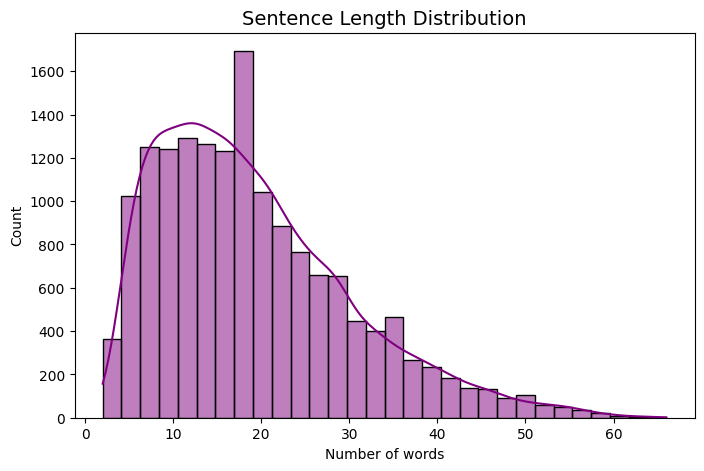

In [ ]:
# Sentence length analysis
train_df["sentence_length"] = train_df["text"].apply(lambda x: len(word_tokenize(str(x))))
plt.figure(figsize=(8,5))
sns.histplot(train_df["sentence_length"], bins=30, kde=True, color="purple")
plt.title("Sentence Length Distribution", fontsize=14)
plt.xlabel("Number of words")
plt.show()

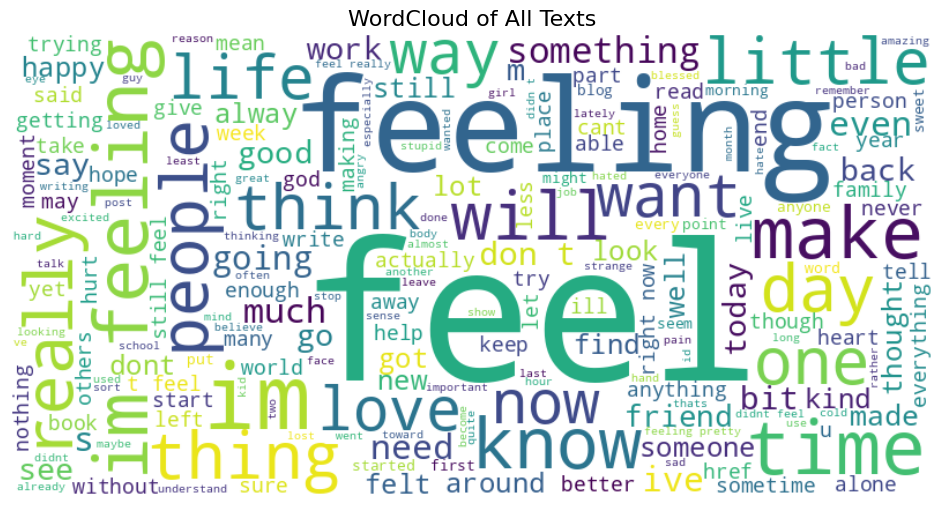

In [ ]:
#  WordCloud for all text
all_text = " ".join(train_df["text"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of All Texts", fontsize=16)
plt.show()

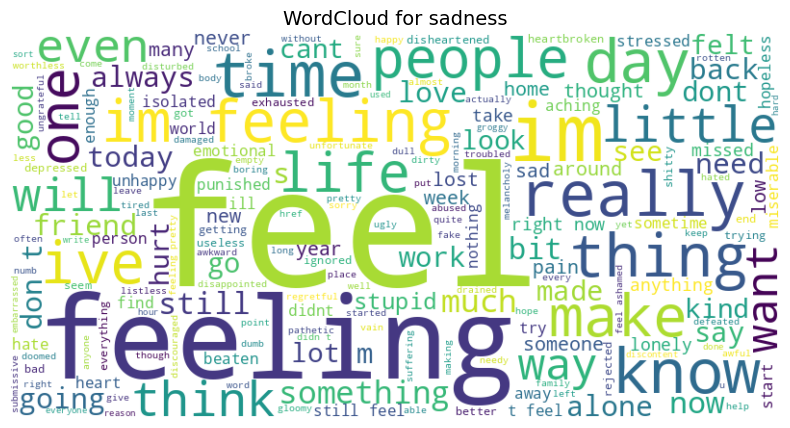

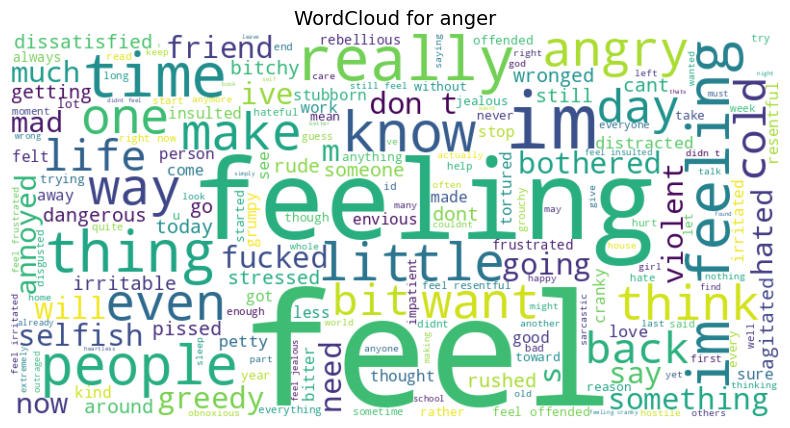

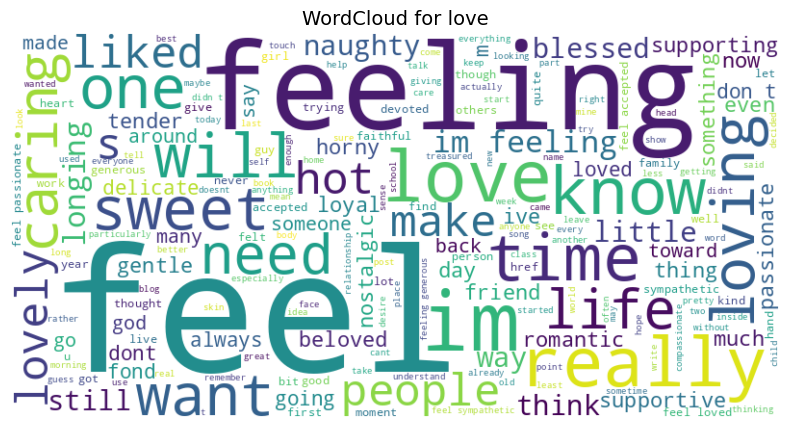

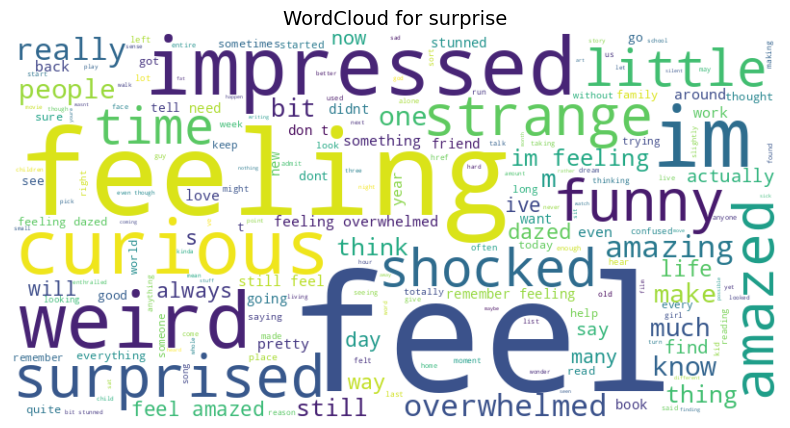

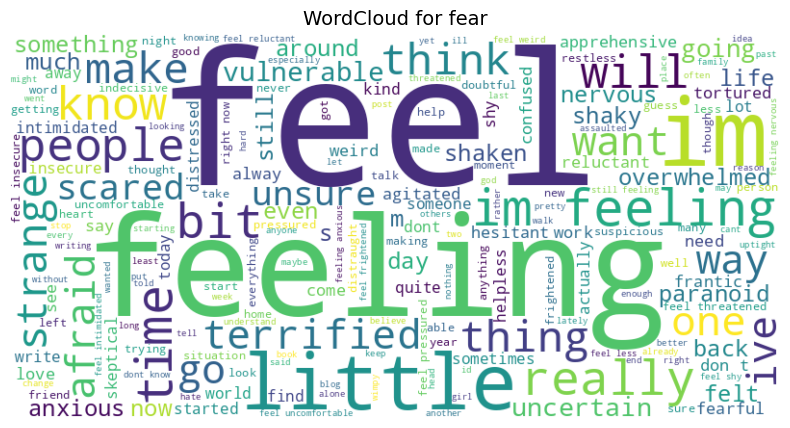

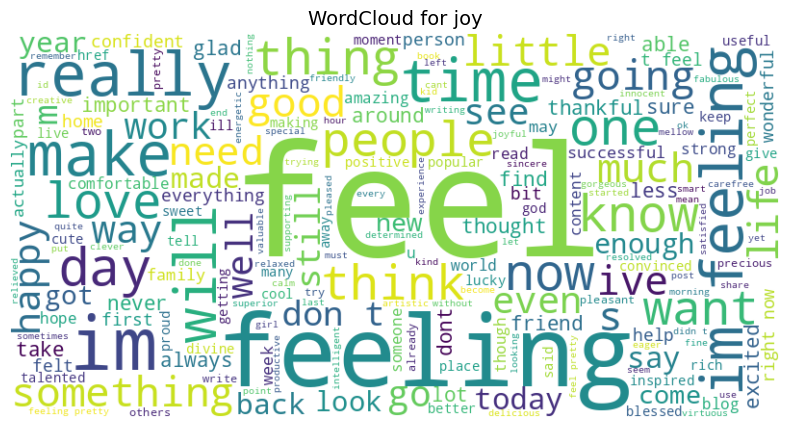

In [ ]:
##WordCloud per emotion
emotions = train_df["label"].unique()
for emotion in emotions:
    text = " ".join(train_df[train_df["label"]==emotion]["text"].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {emotion}", fontsize=14)
    plt.show()

In [ ]:
import re
text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
print(text)

i have been with petronas for years i feel that petronas has performed well and made a huge profit i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter i have immense sympathy with the general point but as a possible proto writer trying to find time to write in the corners of life and with no sign of an agent let alone a publishing contract this feels a little precious i do not feel reassured anxiety is on each side i have the feeling she was amused and delighted i was able to help chai lifeline with your support and encouragement is a great feeling and i am so glad you were able to help me i feel more superior dead chicken or grieving child i get giddy over feeling elegant in a perfectly fitted pencil skirt i can t imagine a real life scenario where i would be emotionally connected enough with someone to feel totally accepted and safe where it it morally acceptable for me to have close and prolonged physical contact and where sex

In [ ]:
tokens = text.split()
print(tokens)

['i', 'have', 'been', 'with', 'petronas', 'for', 'years', 'i', 'feel', 'that', 'petronas', 'has', 'performed', 'well', 'and', 'made', 'a', 'huge', 'profit', 'i', 'do', 'feel', 'that', 'running', 'is', 'a', 'divine', 'experience', 'and', 'that', 'i', 'can', 'expect', 'to', 'have', 'some', 'type', 'of', 'spiritual', 'encounter', 'i', 'have', 'immense', 'sympathy', 'with', 'the', 'general', 'point', 'but', 'as', 'a', 'possible', 'proto', 'writer', 'trying', 'to', 'find', 'time', 'to', 'write', 'in', 'the', 'corners', 'of', 'life', 'and', 'with', 'no', 'sign', 'of', 'an', 'agent', 'let', 'alone', 'a', 'publishing', 'contract', 'this', 'feels', 'a', 'little', 'precious', 'i', 'do', 'not', 'feel', 'reassured', 'anxiety', 'is', 'on', 'each', 'side', 'i', 'have', 'the', 'feeling', 'she', 'was', 'amused', 'and', 'delighted', 'i', 'was', 'able', 'to', 'help', 'chai', 'lifeline', 'with', 'your', 'support', 'and', 'encouragement', 'is', 'a', 'great', 'feeling', 'and', 'i', 'am', 'so', 'glad', 'you

In [ ]:
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text = "Natural Language Processing is amazing! Machines can now understand human language. This is incredible!"
sentences = sent_tokenize(text)
print(sentences)

['Natural Language Processing is amazing!', 'Machines can now understand human language.', 'This is incredible!']


In [ ]:
from nltk.tokenize import word_tokenize

words = word_tokenize(text)
print(words)

['Natural', 'Language', 'Processing', 'is', 'amazing', '!', 'Machines', 'can', 'now', 'understand', 'human', 'language', '.', 'This', 'is', 'incredible', '!']


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
tokens = tokenizer.tokenize("unbelievable learning in NLP")
print(tokens)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


['unbelievable', 'learning', 'in', 'nl', '##p']


In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]
print(tokens)

['unbelievable', 'learning', 'nl', '##p']


In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
words = ["running", "flies", "easily", "happily", "better", "studies"]
stems = [stemmer.stem(word) for word in words]
print(stems)

['run', 'fli', 'easili', 'happili', 'better', 'studi']


In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(word) for word in words]
print(lemmas)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['running', 'fly', 'easily', 'happily', 'better', 'study']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

texts = ["Harry loves learning NLP!", "Adil is teaching NLP to Harry."]
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(texts)

print(vectorizer.get_feature_names_out())  # List of words
print(bow_matrix.toarray())  # Word counts

['adil' 'harry' 'is' 'learning' 'loves' 'nlp' 'teaching' 'to']
[[0 1 0 1 1 1 0 0]
 [1 1 1 0 0 1 1 1]]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)

print(vectorizer.get_feature_names_out())  # List of words
print(tfidf_matrix.toarray())  # TF-IDF scores

['adil' 'harry' 'is' 'learning' 'loves' 'nlp' 'teaching' 'to']
[[0.         0.40993715 0.         0.57615236 0.57615236 0.40993715
  0.         0.        ]
 [0.44665616 0.31779954 0.44665616 0.         0.         0.31779954
  0.44665616 0.44665616]]


In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 2))  # Unigrams and Bigrams
ngram_matrix = vectorizer.fit_transform(texts)

print(vectorizer.get_feature_names_out())  # List of N-grams
print(ngram_matrix.toarray())  # N-gram frequencies

['adil' 'adil is' 'harry' 'harry loves' 'is' 'is teaching' 'learning'
 'learning nlp' 'loves' 'loves learning' 'nlp' 'nlp to' 'teaching'
 'teaching nlp' 'to' 'to harry']
[[0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0]
 [1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1]]


In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec
import gensim.downloader as api

# Load a sample dataset
dataset = api.load("text8")  # A dataset used for training Word2Vec models

# Train Word2Vec with CBOW
model_cbow = Word2Vec(dataset, vector_size=100, window=5, min_count=2, sg=0)

# Find similar words
print(model_cbow.wv.most_similar("learning"))

[('teaching', 0.7327420711517334), ('knowledge', 0.6750531792640686), ('classroom', 0.6701372861862183), ('communication', 0.6508709788322449), ('creativity', 0.6468080878257751), ('curriculum', 0.6366032361984253), ('education', 0.6353164911270142), ('educational', 0.6217524409294128), ('lesson', 0.6150441765785217), ('cognitive', 0.6143666505813599)]


In [37]:
# Train Word2Vec with Skip-gram
model_skipgram = Word2Vec(dataset, vector_size=100, window=5, min_count=2, sg=1)

# Find similar words
print(model_skipgram.wv.most_similar("computer"))

[('computers', 0.8090425729751587), ('computing', 0.7828167676925659), ('laptop', 0.7827853560447693), ('hardwired', 0.7819440364837646), ('hardware', 0.7799766063690186), ('networked', 0.7690450549125671), ('homebrew', 0.7645142078399658), ('pdas', 0.7618885040283203), ('bootstrap', 0.759023129940033), ('windowing', 0.7565625905990601)]


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample dataset
data = {"Review": ["This movie was amazing!", "Worst movie ever!", "I loved it!", "I hated it!"],
        "Sentiment": ["Positive", "Negative", "Positive", "Negative"]}

df = pd.DataFrame(data)
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(df["Review"], df["Sentiment"], test_size=0.2, random_state=42)

# Converting text into TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Training the classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Making predictions
y_pred = model.predict(X_test_tfidf)

# Checking accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.0


In [42]:
new_reviews = ["The movie was fantastic!", "I hated this film so much."]
new_reviews_tfidf = vectorizer.transform(new_reviews)
predictions = model.predict(new_reviews_tfidf)

for review, sentiment in zip(new_reviews, predictions):
    print(f"Review: {review} → Sentiment: {sentiment}")

Review: The movie was fantastic! → Sentiment: Positive
Review: I hated this film so much. → Sentiment: Positive


In [46]:
import nltk
from nltk import pos_tag, word_tokenize

# Sample sentence
sentence = "Harry runs fast."

# Tokenization and POS tagging
tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)

print(pos_tags)

[('Harry', 'NNP'), ('runs', 'VBZ'), ('fast', 'RB'), ('.', '.')]


In [47]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [48]:
import nltk
from nltk import pos_tag, word_tokenize

# Sample sentence
sentence = "Harry runs fast."

# Tokenization and POS tagging
tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)

print(pos_tags)

[('Harry', 'NNP'), ('runs', 'VBZ'), ('fast', 'RB'), ('.', '.')]


In [49]:
import nltk
from nltk.tag import hmm

# Training HMM-based POS tagger
train_data = [[('Harry', 'NNP'), ('runs', 'VBZ'), ('fast', 'RB')],
              [('The', 'DT'), ('dog', 'NN'), ('barks', 'VBZ')]]

trainer = hmm.HiddenMarkovModelTrainer()
hmm_tagger = trainer.train(train_data)

# Testing
print(hmm_tagger.tag(['The', 'dog', 'runs', 'fast']))

[('The', 'DT'), ('dog', 'NN'), ('runs', 'VBZ'), ('fast', 'RB')]


/usr/local/lib/python3.12/dist-packages/nltk/tag/hmm.py:333: RuntimeWarning: overflow encountered in cast
  X[i, j] = self._transitions[si].logprob(self._states[j])
/usr/local/lib/python3.12/dist-packages/nltk/tag/hmm.py:335: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])
/usr/local/lib/python3.12/dist-packages/nltk/tag/hmm.py:331: RuntimeWarning: overflow encountered in cast
  P[i] = self._priors.logprob(si)


In [50]:
from nltk.tag import hmm

# Testing with Viterbi algorithm
sentence = ['The', 'dog', 'runs', 'fast']
best_tags = hmm_tagger.tag(sentence)
print(best_tags)

[('The', 'DT'), ('dog', 'NN'), ('runs', 'VBZ'), ('fast', 'RB')]
